In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Demographic_Data.csv')

In [3]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [5]:
data = data.drop_duplicates()
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [6]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


Question1: Do customers in different regions spend more per transaction? 
    (rows = transactions)
    Important columns: region, amount
    groupby - region, find aggregates for amount of each group
    Which aggregates? Mean, mean absolute deviation, min and max

Question2: Is there a relationship between number of items purchased and amount spent?
    Important columns: items, amount
    groupby - items, find aggregates for amount of each group

Clean up data = remove outliers, rename region and in-store data.
    will need to remove outliers for each question separately? 
        both would be for amount - but other tasks require same data

In [7]:
#rename regions
data['region'] = data['region'].astype('string')
data['region'] = data['region'].replace('1','North')
data['region'] = data['region'].replace('2','South')
data['region'] = data['region'].replace('3','East')
data['region'] = data['region'].replace('4','West')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,South
1,0,35,2,219.51,South
2,1,45,3,1525.70,West
3,1,46,3,715.25,East
4,1,33,4,1937.50,North


In [8]:
#change name of in-store column values
data['in-store'] = data['in-store'].astype('string')
data['in-store'] = data['in-store'].replace('0','In-Store')
data['in-store'] = data['in-store'].replace('1','Online')
data.head()

,in-store,age,items,amount,region
0,In-Store,37,4,281.03,South
1,In-Store,35,2,219.51,South
2,Online,45,3,1525.70,West
3,Online,46,3,715.25,East
4,Online,33,4,1937.50,North


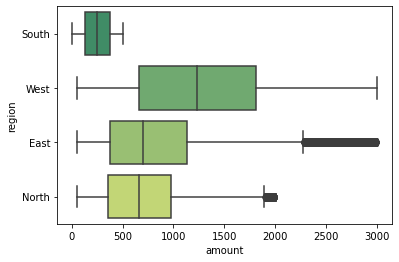

In [113]:
#Checking with visualizations
ax = sns.boxplot(x="amount", y="region", data=data, palette="summer")

In [10]:
#finding the limits of the interquartile ranges 
#outliers will be beyond these ranges
q05 = np.quantile(data.amount,.05)
q95 = np.quantile(data.amount,.95)
mean = np.mean(data.amount)
print(q05, q95,mean)

80.3809 2409.119999999998 835.8257266344899


In [11]:
#removing outliers using quartile ranges
data2 = data[(data.amount>=q05) & (data.amount<=q95)]
outliers = data[(data.amount<q05) & (data.amount>q95)]
data2.describe()

,age,items,amount
count,71981.000000,71981.000000,71981.000000
mean,45.598630,4.504772,775.770922
std,15.622632,2.060598,586.817310
min,18.000000,1.000000,80.381000
25%,33.000000,3.000000,309.960000
50%,44.000000,4.000000,582.140000
75%,56.000000,6.000000,1118.800000
max,85.000000,8.000000,2409.100000


In [12]:
#Question 1 start
#group data by region and amount, get aggregations for each
Q1 = data2.groupby('region')['amount'].describe()
Q1

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
East,16263.0,781.750579,561.132683,80.385,364.940,659.62,951.875,2409.10
North,15563.0,763.935680,486.399290,80.510,382.135,680.24,980.830,1999.80
South,16967.0,289.427913,121.232103,80.381,184.440,288.26,394.060,499.94
West,23188.0,1135.384797,613.264262,80.483,613.630,1122.60,1642.800,2409.10


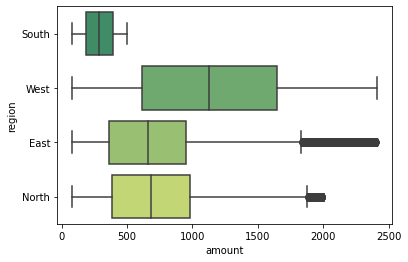

In [126]:
#Visualize the ranges for each region
ax = sns.boxplot(x="amount", y="region", data=data2, palette="summer")
plt.savefig('C1T1_amt_rgn2.png', dpi=300, bbox_inches='tight')

Initial observations: The southern region spends the least amount of money by far. The West spends the most.
Would comparing to any other columns reveal why?

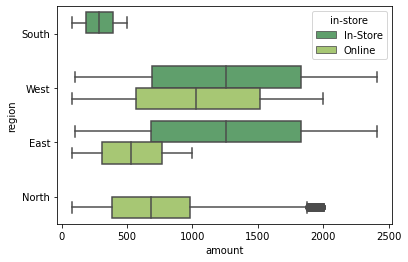

In [125]:
#Visualize the ranges for each region, separating the in-store and online data
ax = sns.boxplot(x="amount", y="region", hue='in-store', data=data2, palette='summer')
plt.savefig('C1T1_amt_rgn1.png', dpi=300, bbox_inches='tight')

Comparing the previous information to the in-store column reveals some missing data.

There is no data for In-store purchases for the North region. The data is either not given or there have been no in-store purchases made. No purchases is unlikely unless there are no brick-and-mortar stores in the North.

There is also no data for Online purchases for the South region. The data is either not given or no in-store purchases were made. No purchases is unlikely, unless no online ordering system exists in the South.

We can still make some observations - East region prefers to spend more in-store, West is more evenly split but still a preference for larger in-store purchases.

Even separating the online and in-store purchases, the South still spends the least while the West spends the most. Though the in-store purchases for East and West are about the same, the West spends more online. 

Would the count make any difference?

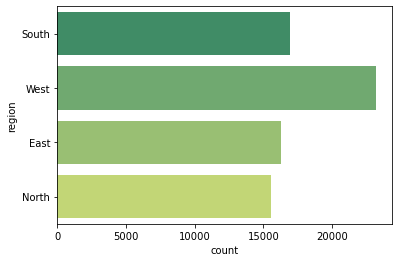

In [130]:
ax = sns.countplot(y='region', palette="summer", data=data2)

There are more purchases in the West region than the others. South, East, and North have around the same count, with North as the least. Interestingly, the South has the second-most, even though there is no online purchase data and they spend the least.

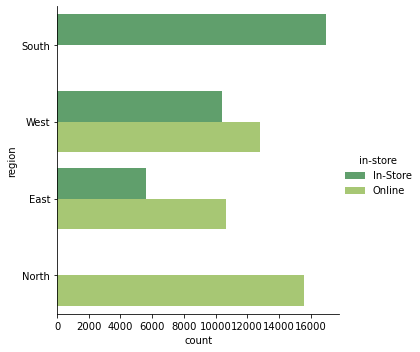

In [131]:
ax = sns.catplot(data=data2, y='region', hue='in-store', palette='summer', kind='count')

The South has the most in-store purchases by far, while the North has the most online purchases. Is this because the other option is not available?

Either way, there does not appear to be a correlation between the purchase count and the amount spent in those purchases.

In [17]:
#Question 2 start
#group data by items purchased and amount, get aggregations for each
Q2 = data2.groupby('items')['amount'].describe()
Q2

,count,mean,std,min,25%,50%,75%,max
items,,,,,,,,
1,5134.0,772.276336,585.260558,80.439,311.5375,576.110,1104.050,2408.5
2,10125.0,783.087130,593.493324,80.381,308.6200,587.130,1138.000,2409.1
3,10372.0,779.801769,585.522508,80.385,315.2400,591.030,1137.925,2408.6
4,10410.0,764.121376,580.338423,80.533,307.5325,573.630,1076.150,2407.9
5,10170.0,779.413376,588.537739,80.583,310.2150,586.370,1123.525,2407.5
6,10324.0,773.162001,585.169264,80.409,308.2950,574.690,1119.025,2409.1
7,10244.0,770.907771,585.845856,80.422,307.6100,577.955,1094.775,2408.6
8,5202.0,787.888810,592.377881,80.598,317.7800,587.055,1163.475,2406.3


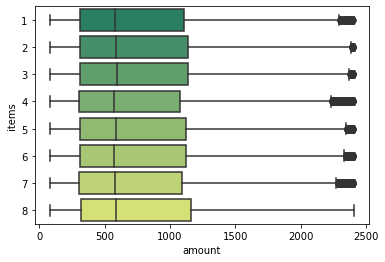

In [127]:
#Plot the information given above
ax = sns.boxplot(x="amount", y="items", orient='h', data=data2, palette="summer")
plt.savefig('C1T1_amt_itm1.png', dpi=300, bbox_inches='tight')

There does not appear to be any correlation between the number of items and the total cost of the purchase. Because this is an electronics store, people may be buying large items as single purchases, or along with something small.
    #Can I make speculations like that?
    
Compare with other columns

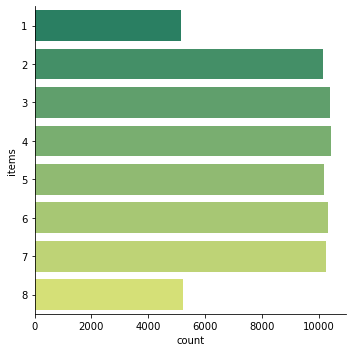

In [120]:
ax = sns.catplot(data=data2, y='items', palette='summer', kind='count')

There appear to be fewer single-item and 8-item purchases. Could this affect the amount spent per item? Unlikely.

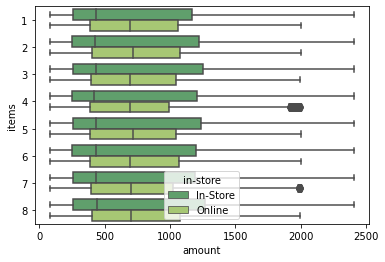

In [121]:
ax = sns.boxplot(x="amount", y="items", orient='h', data=data2, palette="summer", hue="in-store")

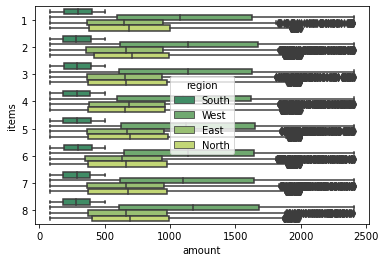

In [122]:
ax = sns.boxplot(x="amount", y="items", orient='h', data=data2, palette="summer", hue="region")

In [ ]:
ax = sns.histplot(x="amount", y="age", bins=10, data=data2, hue='amount', palette="summer")

Even after comparisons with other variables, the amount of money spent seems to be the same no matter how many items a customer buys.  There appears to be no correlation between the amount spent and how many items they buy.

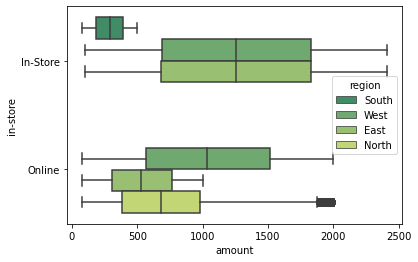

In [123]:
#pretty much the same as one of the graphs in q1, but y and hue are switched
ax = sns.boxplot(x="amount", y="in-store", data=data2, palette="summer", hue="region")